In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\Users\formy\Desktop\Fazila\DataScience Course\Case_Studies\Case_Study1\Assignment4\Wine_clust.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
data.shape

(178, 13)

In [7]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
type(data)

pandas.core.frame.DataFrame

## KMeans Clustering

In [9]:
from sklearn.cluster import KMeans

In [10]:
#create an empty array to store the Wcss scores
wcss=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init ='k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

C:\Users\formy\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [11]:
wcss

[17592296.383508474,
 4543749.614531862,
 2370689.686782968,
 1337029.4929415903,
 916379.187153917,
 647326.0020260846,
 412303.8282508013,
 323223.24705426674,
 270954.9292415375,
 217887.378560333,
 186382.92305063075,
 166245.77997591507]

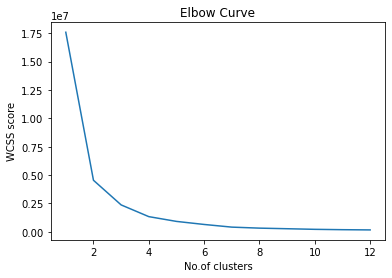

In [12]:
#plottinf no.clusters Vs wcss
plt.plot(range(1,13),wcss)
plt.title('Elbow Curve')
plt.xlabel('No.of clusters')
plt.ylabel('WCSS score')
plt.show()

In [13]:
# From the Elbow method take no.of clusters as 3

In [14]:
# K-Means with i=3
kmeans1=KMeans(n_clusters=3,init ='k-means++',random_state=42)
y_kmeans1=kmeans1.fit_predict(data)  

In [15]:
# silhouette Score with k=3
from sklearn.metrics import silhouette_score
silhouette_sc1=silhouette_score(data,y_kmeans1)
print(silhouette_sc1)

0.571138193786884


In [16]:
# K-Means with i=2
kmeans2=KMeans(n_clusters=2,init ='k-means++',random_state=42)
y_kmeans2=kmeans2.fit_predict(data)  

In [17]:
# silhouette Score with k=2
from sklearn.metrics import silhouette_score
silhouette_sc2=silhouette_score(data,y_kmeans2)
print(silhouette_sc2)

0.6568536504294317


In [18]:
# Since silhouette score is more for k=2,the optimum no. of clusters is 2

## Agglomerative HC

In [19]:
import scipy.cluster.hierarchy as sch

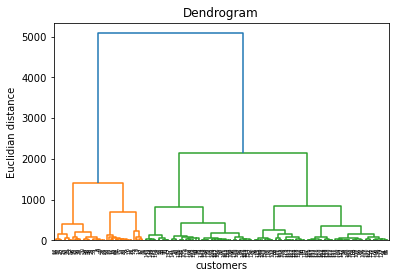

In [20]:
dendrogram=sch.dendrogram(sch.linkage(data,method='ward'))
plt.title('Dendrogram')
plt.xlabel('customers')
plt.ylabel('Euclidian distance')
plt.show()

In [21]:
# from the dendrogram 2 clusters are there

In [22]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')

In [23]:
y_hc=hc.fit_predict(data)

In [24]:
#Calculate Sillouette score
from sklearn.metrics import silhouette_score
silhouette_ag=silhouette_score(data,y_hc)
print(silhouette_ag)

0.6587292996216912


## PCA

#### Scaling of data

In [25]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [26]:
scaled_data=sc.fit_transform(data)

In [27]:
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [28]:
# Since the scaled data in array format convert that into dataframe
scaled_data=pd.DataFrame(scaled_data,columns=data.columns)

In [29]:
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [30]:
from sklearn.decomposition import PCA

In [31]:
# Specify the number of components as 10
pca=PCA(n_components=10)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

In [32]:
x_pca.shape

(178, 10)

In [33]:
x_pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
         6.51390947e-02,  6.41442706e-01,  1.02095585e+00],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
         1.02441595e+00, -3.08846753e-01,  1.59701372e-01],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -3.44216131e-01, -1.17783447e+00,  1.13360857e-01],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         4.70238043e-02,  1.22214687e-03, -2.47997312e-01],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         3.90828774e-01,  5.74476725e-02,  4.91489502e-01],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.92913734e-01,  7.41660423e-01, -1.17969019e-01]])

In [34]:
# check the variance of the ten components
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019])

In [35]:
np.sum(pca.explained_variance_ratio_)

0.9616971684450644

In [36]:
# Varaince is 96% with 10 principal components

#### Specify the variance as 95%

In [37]:
pca1=PCA(n_components=.95)
pca1.fit(scaled_data)
x_pca1=pca1.transform(scaled_data)

In [38]:
x_pca1.shape

(178, 10)

## DBSCAN 

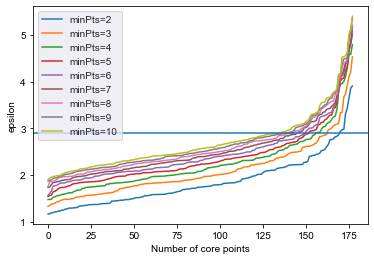

In [39]:
#Deciding Optimal value for epsilon
from sklearn.neighbors import NearestNeighbors

# we use sklearn to find the nearest neighbors
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(scaled_data)
distances, indices = nbrs.kneighbors(scaled_data)
for k in range(1, 10):
    distances_k = np.sort(distances[:,k], axis=0)
    plt.plot(distances_k, label='minPts=%i' % (k+1))
sns.set_style('darkgrid')
plt.ylabel('epsilon')
plt.xlabel('Number of core points')
plt.axhline(2.9)
#plt.axhline(2.7)
plt.legend()
plt.show()

In [40]:
# from the figure take epsilon value as 3

## Apply DBSCAN clustering

In [46]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3 ,min_samples=2)
dbscan.fit(scaled_data)
clusters = dbscan.labels_
len(set(clusters))

4

In [48]:
# Data points count per label
unique, counts = np.unique(clusters, return_counts=True)
np.asarray((unique, counts)).T

array([[ -1,   5],
       [  0, 168],
       [  1,   3],
       [  2,   2]], dtype=int64)

In [49]:
from sklearn.metrics import silhouette_score
silhouette_db=silhouette_score(scaled_data,clusters)
print(silhouette_db)

0.1342575010132213
